In [144]:
from arcpy import *
from arcpy import env
from arcpy.sa import *
import pandas as pd
import numpy as np
import os, datetime
from osgeo import ogr
import rasterio
import xarray as xr
from rasterio.transform import from_origin
import subprocess, time
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib as mpl

In [145]:
path_excel_ground = r"D:\Code_Result\Result\NASA\Ground_Data\Observed_Data_July.xlsx"
data_excel_file = pd.ExcelFile(path_excel_ground)
print(data_excel_file.sheet_names)

['Pendleton - McKay Cr', 'Portland - SE Lafaye', 'Portland - Sauvie Is', 'Portland - Spangler', 'Portland Near Road', 'John Day Dayton St', 'Estacada Clackamas R', 'Grants Pass - Parksi', 'Klamath Falls - Pete', 'Albany - Calapooia S', 'Lakeview - Center &', 'Baker City - Forest', 'Beaverton - Highland', 'Turner - CJHS', 'Hillsboro - Hare Fie', 'Hermiston - Municipa', 'The Dalles - Cherry', 'Madras - Westside Sc', 'Talent - Rapp Lane', 'Sweet Home - Fire De', 'Cave Junction Forest', 'Sisters Forest Servi', 'Silverton', 'Shady Cove - Shady C', 'Cottage Grove City S', 'Salem - State Hospit', 'Eugene - Highway 99', 'Eugene - Amazon Park', 'Oakridge - Willamett', 'Roosevelt High Schoo', 'Portland Lane Middle', 'Portland Lincoln Hig', 'Portland SE 12th and', 'Portland McDaniel Hi', 'Enterprise - US Fore', 'Ashland Fire Dept', 'Sunriver Three River', 'Bend Pine Ridge Elem', 'Bend Ponderosa Eleme', 'Bend - Pump Station', 'Salem Chemeketa Comm', 'Toledo NE Hwy20 & NW', 'Woodburn Chemeketa C', 

In [146]:
data_1 = {}; data_2 = {}; data_in_general = {}

In [147]:
stations = data_excel_file.sheet_names
for station in stations:
    data_excel = pd.read_excel(path_excel_ground, sheet_name=station)
    data_excel = data_excel[data_excel["PM2.5"].notna()]; data_excel.reset_index(inplace=True)
    data_2[station] = data_excel
for station in stations:
    data_1[station] = pd.DataFrame()

In [148]:
excel_path = "D:/Code_Result/Result/NASA/Value_Data_30minutes/"
excel_files = os.listdir(excel_path)

dict_data = {}
variables = ["PM25_RH35_GCC"]
for variable in variables:
    for index in range(len(stations)):
        dict_data[variable + "_" + stations[index]] = []

for excel in excel_files:
    if (excel.endswith(".xlsx")):
        parts = excel.split('_')
        year = int(parts[0]); month = int(parts[1])
        day = int(parts[2]); hour = int(parts[3])
        variable = excel[14:-5]
        print(year, month, day, hour, variable)
        excel_file_path = excel_path + excel
        data = pd.read_excel(excel_file_path)
        for index in range(len(stations)):
            dict_data[variable + "_" + stations[index]].append(data['RASTERVALU'][index])

2023 7 1 0 PM25_RH35_GCC
2023 7 1 1 PM25_RH35_GCC
2023 7 1 2 PM25_RH35_GCC
2023 7 1 3 PM25_RH35_GCC
2023 7 1 4 PM25_RH35_GCC
2023 7 1 5 PM25_RH35_GCC
2023 7 1 6 PM25_RH35_GCC
2023 7 1 7 PM25_RH35_GCC
2023 7 1 8 PM25_RH35_GCC
2023 7 1 9 PM25_RH35_GCC
2023 7 1 10 PM25_RH35_GCC
2023 7 1 11 PM25_RH35_GCC
2023 7 1 12 PM25_RH35_GCC
2023 7 1 13 PM25_RH35_GCC
2023 7 1 14 PM25_RH35_GCC
2023 7 1 15 PM25_RH35_GCC
2023 7 1 16 PM25_RH35_GCC
2023 7 1 17 PM25_RH35_GCC
2023 7 1 18 PM25_RH35_GCC
2023 7 1 19 PM25_RH35_GCC
2023 7 1 20 PM25_RH35_GCC
2023 7 1 21 PM25_RH35_GCC
2023 7 1 22 PM25_RH35_GCC
2023 7 1 23 PM25_RH35_GCC
2023 7 2 0 PM25_RH35_GCC
2023 7 2 1 PM25_RH35_GCC
2023 7 2 2 PM25_RH35_GCC
2023 7 2 3 PM25_RH35_GCC
2023 7 2 4 PM25_RH35_GCC
2023 7 2 5 PM25_RH35_GCC
2023 7 2 6 PM25_RH35_GCC
2023 7 2 7 PM25_RH35_GCC
2023 7 2 8 PM25_RH35_GCC
2023 7 2 9 PM25_RH35_GCC
2023 7 2 10 PM25_RH35_GCC
2023 7 2 11 PM25_RH35_GCC
2023 7 2 12 PM25_RH35_GCC
2023 7 2 13 PM25_RH35_GCC
2023 7 2 14 PM25_RH35_GCC
2023 7

In [149]:
year = 2023; month = 7; day = 31; hour = 24
for index in range(len(stations)):
    day_station = []; hour_station = []
    year_station = []; month_station = []
    for day_index in range(1, day+1, 1):
        for hour_index in range(hour):
            day_station.append(day_index)
            hour_station.append(hour_index)
            year_station.append(year)
            month_station.append(month)
    for hour_index in range(7):
        day_station.append(1)
        hour_station.append(hour_index)
        year_station.append(year)
        month_station.append(8)

    data_1[stations[index]]['Year'] = year_station
    data_1[stations[index]]['Month'] = month_station
    data_1[stations[index]]['Day'] = day_station
    data_1[stations[index]]['Hour'] = hour_station

    for variable in variables:
        data_1[stations[index]][variable] = dict_data[variable + "_" + stations[index]]

In [150]:
for index_tram in range(len(stations)):
    for index in range(data_1[stations[index_tram]]['Year'].size):
        int(data_1[stations[index_tram]]['Year'][index])
        int(data_1[stations[index_tram]]['Month'][index])
        int(data_1[stations[index_tram]]['Day'][index])
        int(data_1[stations[index_tram]]['Hour'][index])
    for index in range(data_2[stations[index_tram]]['Year'].size):
        int(data_2[stations[index_tram]]['Year'][index])
        int(data_2[stations[index_tram]]['Month'][index])
        int(data_2[stations[index_tram]]['Day'][index])
        int(data_2[stations[index_tram]]['Hour'][index])

In [151]:
def Check(year, month, day, hour, index_2, station):
    if (year != data_2[station]['Year'][index_2]
     or month != data_2[station]['Month'][index_2]
     or day != data_2[station]['Day'][index_2]
     or hour != data_2[station]['Hour'][index_2]):
        return False
    return True

In [152]:
day_month = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]; UTC = -7
def date_time(index_1, indextram):
    year = data_1[stations[indextram]]['Year'][index_1]
    month = data_1[stations[indextram]]['Month'][index_1]
    day = data_1[stations[indextram]]['Day'][index_1]
    hour = data_1[stations[indextram]]['Hour'][index_1] + UTC ### UTC -7
    if (UTC < 0):
        if (hour < 0):
            hour = hour + 24; day = day - 1
            if (day == 0):
                month = month-1; day = day_month[month]
    else:
        if (hour > 0):
            hour = hour - 24; day = day+1
            if (day == day_month[month]):
                month = month+1; day = 1
    return year, month, day, hour

In [153]:
data_calibration = pd.DataFrame(columns=["Year", "Month", "Day", "Hour", "Station",
                                            "PM25_High", "PM25_Low",])
index_data_calibration = 0

for index_tram in range(len(stations)):
    print(stations[index_tram])
    data_in_general[stations[index_tram]] = pd.DataFrame(columns=["Year", "Month", "Day", "Hour",
                                                                    "PM25_High", "PM25_Low",])
    index_1 = 0; year, month, day, hour = date_time(index_1, index_tram)
    for index_2 in range(data_2[stations[index_tram]]["PM2.5"].size):
        while(Check(year, month, day, hour, index_2, stations[index_tram]) == False):
            index_1 = index_1 + 1
            year, month, day, hour = date_time(index_1, index_tram)
        data_calibration.loc[index_data_calibration] = {
            "Year": year, "Month": month, "Day": day, "Hour": hour, "Station": stations[index_tram],
            "PM25_High": data_1[stations[index_tram]].at[index_1, "PM25_RH35_GCC"],
            "PM25_Low": data_2[stations[index_tram]].at[index_2, "PM2.5"]
        }
        index_data_calibration += 1
        data_in_general[stations[index_tram]].loc[index_2] = [year, month, day, hour,
                                                         data_1[stations[index_tram]].at[index_1, "PM25_RH35_GCC"],
                                                         data_2[stations[index_tram]].at[index_2, "PM2.5"]]

Pendleton - McKay Cr
Portland - SE Lafaye
Portland - Sauvie Is
Portland - Spangler
Portland Near Road
John Day Dayton St
Estacada Clackamas R
Grants Pass - Parksi
Klamath Falls - Pete
Albany - Calapooia S
Lakeview - Center &
Baker City - Forest
Beaverton - Highland
Turner - CJHS
Hillsboro - Hare Fie
Hermiston - Municipa
The Dalles - Cherry
Madras - Westside Sc
Talent - Rapp Lane
Sweet Home - Fire De
Cave Junction Forest
Sisters Forest Servi
Silverton
Shady Cove - Shady C
Cottage Grove City S
Salem - State Hospit
Eugene - Highway 99
Eugene - Amazon Park
Oakridge - Willamett
Roosevelt High Schoo
Portland Lane Middle
Portland Lincoln Hig
Portland SE 12th and
Portland McDaniel Hi
Enterprise - US Fore
Ashland Fire Dept
Sunriver Three River
Bend Pine Ridge Elem
Bend Ponderosa Eleme
Bend - Pump Station
Salem Chemeketa Comm
Toledo NE Hwy20 & NW
Woodburn Chemeketa C
Corvallis EPA Office
Tillamook Jr High Sc
McMinnville High Sch
Springfield City Hal
Portland Humboldt Sc
Detroit Lake
Crater Lake 

In [154]:
multiplication = data_calibration.groupby('Day').mean()
multiplication['Multiplier'] = multiplication['PM25_Low']/multiplication['PM25_High']
multiplication

,PM25_High,PM25_Low,Multiplier
Day,,,
1,5.514209,3.297842,0.598063
2,5.547320,3.228852,0.582056
3,6.826429,3.472270,0.508651
4,9.284090,6.748282,0.726865
5,15.776939,10.672103,0.676437
6,14.908720,8.038735,0.539197
7,9.971460,5.758585,0.577507
8,7.784524,4.211029,0.540949
9,7.995106,3.821850,0.478024


In [155]:
multiplication.loc[data_calibration.loc[index, 'Day'], 'Multiplier']

0.7595210422913354

In [156]:
for index in range(data_calibration.shape[0]):
    a = data_calibration.loc[index, 'PM25_High']
    b = multiplication.loc[data_calibration.loc[index, 'Day'], 'Multiplier']
    data_calibration.loc[index, 'PM25_High'] = a * b
data_calibration

,Year,Month,Day,Hour,Station,PM25_High,PM25_Low
0,2023,7,1,0,Pendleton - McKay Cr,2.773964,3.5
1,2023,7,1,1,Pendleton - McKay Cr,2.983992,3.3
2,2023,7,1,2,Pendleton - McKay Cr,3.257635,3.1
3,2023,7,1,3,Pendleton - McKay Cr,3.500586,3.2
4,2023,7,1,4,Pendleton - McKay Cr,3.700949,3.4
...,...,...,...,...,...,...,...
48672,2023,7,31,19,Prineville - Davidso,6.510516,9.0
48673,2023,7,31,20,Prineville - Davidso,6.025782,7.0
48674,2023,7,31,21,Prineville - Davidso,5.236563,5.7
48675,2023,7,31,22,Prineville - Davidso,4.606616,5.1


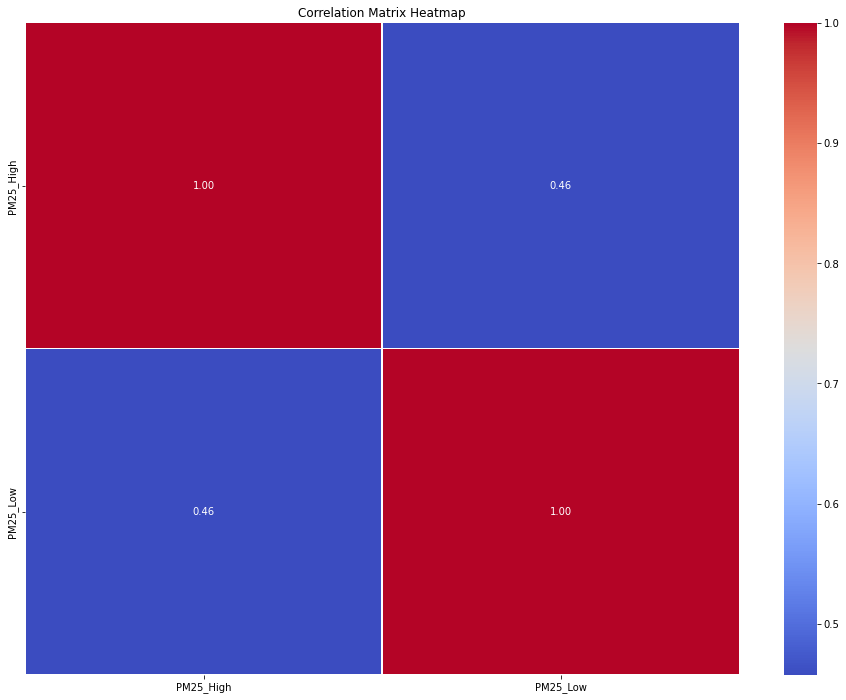

In [157]:
# Select the relevant columns
columns = [
    'PM25_High', 'PM25_Low'
]
data_calibration = data_calibration[columns]

# Compute the correlation matrix
correlation_matrix = data_calibration.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [158]:
correlation_matrix

,PM25_High,PM25_Low
PM25_High,1.000000,0.457462
PM25_Low,0.457462,1.000000


In [159]:
import math
simulated_data = np.array(data_calibration['PM25_High'].values)
simulated_data_verify = np.array(data_calibration['PM25_High'].values)
observed_data_verify = np.array(data_calibration['PM25_Low'].values)
the_change = []
for index in range(observed_data_verify.size):
    if (abs(observed_data_verify[index]-simulated_data_verify[index]) > 0):
        the_change.append(index)

The coefficients of the power function: a = 1.135023074408014, b = 0.9398865558404106
R^2 Function: -0.09111952513659238


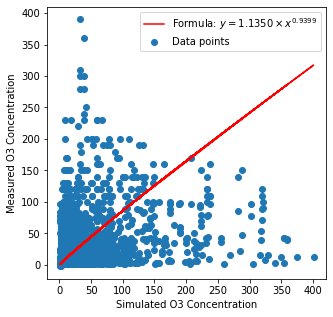

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import rcParams
import random
rcParams['figure.figsize'] = 5,5

a, b = 0, 1.2
a = 1.135023074408014; b = 0.9398865558404106
while (True):
    # while (b >= 1 or b < 0.9 or a < 1 or a > 2):
    #     for i in the_change:
    #         random_number = random.uniform(2, 10)
    #         if (simulated_data[i] > observed_data_verify[i]):
    #             simulated_data[i] = simulated_data[i] - simulated_data[i]/random_number
    #         elif (simulated_data[i] < observed_data_verify[i]):
    #             simulated_data[i] = simulated_data[i] + simulated_data[i]/random_number


    #     print(a, b)
    #     x = simulated_data
    #     y = observed_data_verify
    #     log_x = np.log(x)
    #     log_y = np.log(y)
    #     log_x = log_x[~np.isnan(log_y)]
    #     log_y = log_y[~np.isnan(log_y)]
    #     model = LinearRegression().fit(log_x.reshape(-1, 1), log_y)
    #     slope = model.coef_[0]
    #     intercept = model.intercept_
    #     a = np.exp(intercept)
    #     b = slope
    x = simulated_data
    y = observed_data_verify


    y_pred = a * x**b
    r_squared_function = r2_score(y, y_pred)
    r_squared = r2_score(observed_data_verify, a * simulated_data_verify ** b)

    break
        
df_average = pd.DataFrame({'Average_Sim': simulated_data_verify, 'Average_Obs': observed_data_verify})

fig = plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label=f'Formula: $y = {a:.4f} \\times x^{{{b:.4f}}}$')
plt.xlabel('Simulated O3 Concentration')
plt.ylabel('Measured O3 Concentration')
plt.legend()
print(f'The coefficients of the power function: a = {a}, b = {b}')
print(f'R^2 Function: {r_squared_function}')
fig.savefig(r'D:\Code_Result\Result\NASA\Result_30minutes\Method_2\3_Function.jpg', format="jpg", dpi=1000)
plt.show(); plt.close()

In [161]:
df_error = pd.DataFrame(columns = ["R_Squared", "MAE", "RMSE"])

R²: -0.09111952513659238
MAE: 3.4973274116135813
RMSE: 12.000620280419195


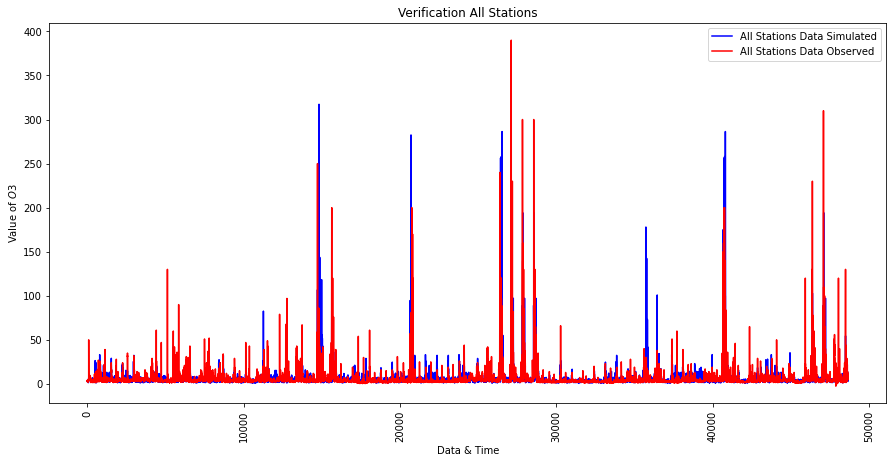

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rcParams['figure.figsize'] = 15,7
calibrated_data_verify = a*simulated_data_verify**b
calibrated_data_verify_x = calibrated_data_verify[:]
observed_data_verify_x = observed_data_verify[:]
R_squared_All_Stations = r2_score(observed_data_verify_x, calibrated_data_verify_x)
r2 = r2_score(observed_data_verify_x, calibrated_data_verify_x)
mae = mean_absolute_error(observed_data_verify_x, calibrated_data_verify_x)
rmse = np.sqrt(mean_squared_error(observed_data_verify_x, calibrated_data_verify_x))
df_error.loc["All_Data"] = [r2, mae, rmse]
fig = plt.figure()
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
# plt.plot(simulated_data_verify*500, color='blue', label=f'All Stations Data Simulated')
plt.plot(calibrated_data_verify_x, color='blue', label=f'All Stations Data Simulated')
plt.plot(observed_data_verify_x, color='red', label='All Stations Data Observed')
plt.xlabel('Data & Time')
plt.ylabel('Value of $O3$')
plt.title('Verification All Stations')
plt.xticks(rotation='vertical')
plt.legend(); plt.show()
fig.savefig(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_2\0_Verification_All.jpg", format="jpg", dpi=1000)
plt.close()

R²: 0.2509983524503495
MAE: 4.170003979601383
RMSE: 13.461238485413967


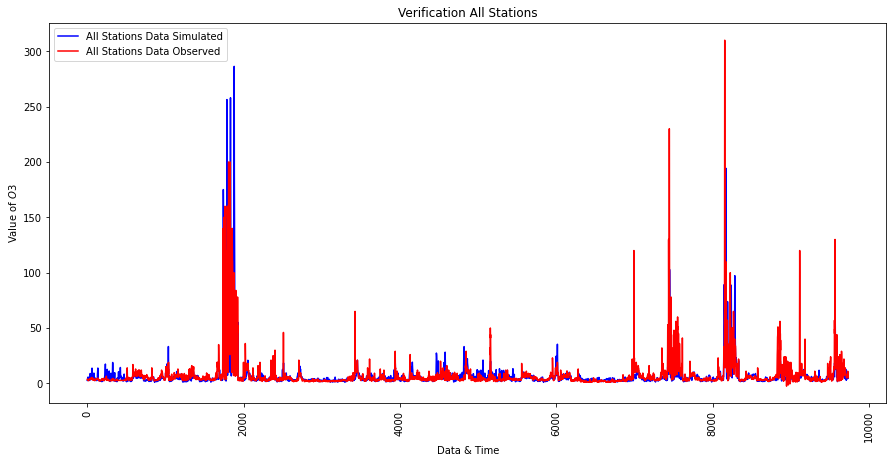

In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rcParams['figure.figsize'] = 15,7
calibrated_data_verify = a*simulated_data_verify**b
size_data = calibrated_data_verify.size
calibrated_data_verify_x = calibrated_data_verify[int(size_data*80/100):]
observed_data_verify_x = observed_data_verify[int(size_data*80/100):]
R_squared_All_Stations = r2_score(observed_data_verify_x, calibrated_data_verify_x)
r2 = r2_score(observed_data_verify_x, calibrated_data_verify_x)
mae = mean_absolute_error(observed_data_verify_x, calibrated_data_verify_x)
rmse = np.sqrt(mean_squared_error(observed_data_verify_x, calibrated_data_verify_x))
df_error.loc["All_Data"] = [r2, mae, rmse]
fig = plt.figure()
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
# plt.plot(simulated_data_verify*500, color='blue', label=f'All Stations Data Simulated')
plt.plot(calibrated_data_verify_x, color='blue', label=f'All Stations Data Simulated')
plt.plot(observed_data_verify_x, color='red', label='All Stations Data Observed')
plt.xlabel('Data & Time')
plt.ylabel('Value of $O3$')
plt.title('Verification All Stations')
plt.xticks(rotation='vertical')
plt.legend(); plt.show()
fig.savefig(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_2\1_Verification_All_80.jpg", format="jpg", dpi=1000)
plt.close()

In [163]:
for index in range(len(stations)):
    observed = data_in_general[stations[index]]["PM25_Low"]
    for index_simulate in range(data_in_general[stations[index]]["PM25_High"].size):
        simulated = data_in_general[stations[index]].loc[index_simulate, "PM25_High"]
        day = int(data_in_general[stations[index]].loc[index_simulate, "Day"])
        multiplier = multiplication.loc[day, "Multiplier"]
        calibrated = simulated * multiplier
        data_in_general[stations[index]].loc[index_simulate, "PM25_Calibrated"] = calibrated

In [ ]:
for index in range(len(stations)):
    observed = data_in_general[stations[index]]["PM25_Low"]
    calibrated = data_in_general[stations[index]]["PM25_Calibrated"]
    r2_verification_station = r2_score(observed, calibrated)
    mae_verification_station = mean_absolute_error(observed, calibrated)
    rmse_verification_station = mean_squared_error(observed, calibrated)
    df_error.loc[stations[index]] = [r2_verification_station, mae_verification_station, rmse_verification_station]
    print(r2_verification_station, mae_verification_station, rmse_verification_station)
    
    fig = plt.figure()
    print(f"R2 Verification {stations[index]}: ", r2_verification_station)
    plt.plot(calibrated, color='blue', label=f'Data Simulated')
    plt.plot(observed, color='red', label=f'Data Observed')
    plt.xlabel('Data & Time')
    plt.ylabel('Value of $O3$')
    plt.title(f'Verification {stations[index]}')
    plt.xticks(rotation='vertical')
    plt.legend()
    fig.savefig(fr"D:\Code_Result\Result\NASA\Result_30minutes\Method_2\{stations[index]}.jpg", format="jpg", dpi=1000)
    plt.close()

In [165]:
df_error.to_excel(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_2\4_Error.xlsx")
multiplication.to_excel(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_2\5_Multiplier.xlsx")